In [5]:
from collections import OrderedDict
from options.train_options import TrainOptions
from data import CreateDataLoader
from models import create_model
from util.visualizer import Visualizer
from PIL import Image
import visdom
from util.util import sdmkdir
import time

In [6]:
opt = TrainOptions().parse()

----------------- Options ---------------
                      GPU: 0                             
               batch_size: 1                             
                   batchs: 16                            
                    beta1: 0.5                           
          checkpoints_dir: C:/Users/m1101/Downloads/Shadow_Removal/SID/_Git_SID/checkpoints_PAMI/
           continue_train: False                         
                 dataroot: C:/Users/m1101/Downloads/Shadow_Removal/SID/_Git_SID/data_processing/dataset/NTUST_TU/train/
             dataset_mode: shadowparam                   
                direction: AtoB                          
              display_env: main                          
             display_freq: 40                            
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://bigiris.cs

In [7]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
model = create_model(opt)
model.setup(opt)

C:/Users/m1101/Downloads/Shadow_Removal/SID/_Git_SID/data_processing/dataset/NTUST_TU/train/train_B
C:/Users/m1101/Downloads/Shadow_Removal/SID/_Git_SID/data_processing/dataset/NTUST_TU/train/train_A
dataset [ShadowParamDataset] was created
initialize network with xavier
DataParallel(
  (module): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, af

In [8]:
total_steps = 0

for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    epoch_iter = 0
    model.epoch = epoch


    for i, data in enumerate(dataset):
        iter_start_time = time.time()
        total_steps += opt.batch_size
        epoch_iter += opt.batch_size
        model.set_input(data)
        model.optimize_parameters()
        model.cepoch=epoch
            
        ##############Visualization block
        if total_steps % opt.display_freq == 0:
            save_result = total_steps % opt.update_html_freq == 0
            # visualizer.display_current_results(model.get_current_visuals(), epoch)
        if total_steps % opt.print_freq == 0:
            errors = model.get_current_losses()
            t = (time.time() - iter_start_time) / opt.batch_size
        #    visualizer.print_current_errors(epoch, epoch_iter, errors, t)
            # if opt.display_id > 0:
            #     visualizer.plot_current_losses(epoch, float(epoch_iter)/dataset_size, opt, errors)
        ###################################


    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' %
              (epoch, total_steps))
        model.save_networks('latest')
        model.save_networks(epoch)


    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))
    model.update_learning_rate()

End of epoch 1 / 50 	 Time Taken: 417 sec
learning rate = 0.0002000
saving the model at the end of epoch 2, iters 3200
End of epoch 2 / 50 	 Time Taken: 418 sec
learning rate = 0.0002000
End of epoch 3 / 50 	 Time Taken: 417 sec
learning rate = 0.0002000
saving the model at the end of epoch 4, iters 6400
End of epoch 4 / 50 	 Time Taken: 420 sec
learning rate = 0.0002000
End of epoch 5 / 50 	 Time Taken: 414 sec
learning rate = 0.0002000
saving the model at the end of epoch 6, iters 9600
End of epoch 6 / 50 	 Time Taken: 419 sec
learning rate = 0.0002000
End of epoch 7 / 50 	 Time Taken: 416 sec
learning rate = 0.0002000
saving the model at the end of epoch 8, iters 12800
End of epoch 8 / 50 	 Time Taken: 419 sec
learning rate = 0.0002000
End of epoch 9 / 50 	 Time Taken: 414 sec
learning rate = 0.0002000
saving the model at the end of epoch 10, iters 16000
End of epoch 10 / 50 	 Time Taken: 413 sec
learning rate = 0.0001951
End of epoch 11 / 50 	 Time Taken: 410 sec
learning rate = 0.

In [9]:
test_model = create_model(opt)
test_model.setup(opt)
test_model.load_networks(50)

initialize network with xavier
DataParallel(
  (module): ResNet(
    (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplac

loading the model from C:/Users/m1101/Downloads/Shadow_Removal/SID/_Git_SID/checkpoints_PAMI/SID_GRESNEXT_shadowparam\50_net_M.pth


In [10]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)

C:/Users/m1101/Downloads/Shadow_Removal/SID/_Git_SID/data_processing/dataset/NTUST_TU/train/train_B
C:/Users/m1101/Downloads/Shadow_Removal/SID/_Git_SID/data_processing/dataset/NTUST_TU/train/train_A
dataset [ShadowParamDataset] was created


In [11]:
import torch
import torch.nn.functional as F
import numpy as np
import util.util as util
import matplotlib.pyplot as plt

In [12]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda_tensor = torch.cuda.FloatTensor if device == torch.device('cuda:0') else torch.FloatTensor

list_A = torch.tensor([]).type(cuda_tensor)
list_B = torch.tensor([]).type(cuda_tensor)
list_C = torch.tensor([]).type(cuda_tensor)
list_param = torch.tensor([]).type(cuda_tensor)

for _, data in enumerate(dataset):
    list_A = torch.cat((list_A, data['A'].type(cuda_tensor)), 0)
    list_B = torch.cat((list_B, data['B'].type(cuda_tensor)), 0)
    list_C = torch.cat((list_C, data['C'].type(cuda_tensor)), 0)
    list_param = torch.cat((list_param, data['param'].type(cuda_tensor)), 0)
    
    if len(list_A) == 5:
        break

In [13]:
result_list = list()
for i in range(len(list_A)):
    input_img = list_A[i][None, :, :, :]
    shadow_mask = list_B[i][None, :, :, :]
    inputG = torch.cat([input_img,shadow_mask],1)
    shadow_mask = (shadow_mask>0.9)*2-1
    shadow_mask_3d= (shadow_mask>0).expand(input_img.shape)   

    inputG = F.interpolate(inputG,size=(256,256))
    shadow_param_pred = test_model.netG(inputG)
    w = input_img.shape[2]
    h = input_img.shape[3]
    n = input_img.shape[0]
    m = input_img.shape[1]
    shadow_param_pred = shadow_param_pred.view([n,6,-1])
    shadow_param_pred = torch.mean(shadow_param_pred,dim=2)
    shadow_param_pred[:,[1,3,5]] = (shadow_param_pred[:,[1,3,5]]*2)+3 

    lit = input_img.clone()/2+0.5
    add = shadow_param_pred[:,[0,2,4]]
    mul = shadow_param_pred[:,[1,3,5]]
    #mul = (mul +2) * 5/3          
    n = shadow_param_pred.shape[0]
    add = add.view(n,3,1,1).expand((n,3,w,h))
    mul = mul.view(n,3,1,1).expand((n,3,w,h))
    lit = lit*mul + add
    out = (input_img/2+0.5)*~(shadow_mask_3d) + lit*shadow_mask_3d
    out = out*2-1

    inputM = torch.cat([input_img,lit,shadow_mask],1)
    alpha_pred = test_model.netM(inputM)
    alpha_pred = (alpha_pred +1) /2        
    #alpha_pred_3d=  alpha_pred.repeat(1,3,1,1)

    final = (input_img/2+0.5)*(1-alpha_pred) + lit*alpha_pred
    final = final*2-1

    RES = dict()
    RES['final']= util.tensor2im(final,scale =0)
    RES['phase1'] = util.tensor2im(out,scale =0)
    RES['param']= shadow_param_pred.detach().cpu() 
    RES['matte'] = util.tensor2im(alpha_pred.detach().cpu()/2,scale =0)
    result_list.append(RES)

Param:  tensor([[0.3570, 0.9998, 0.3600, 0.9998, 0.3545, 0.9991]])


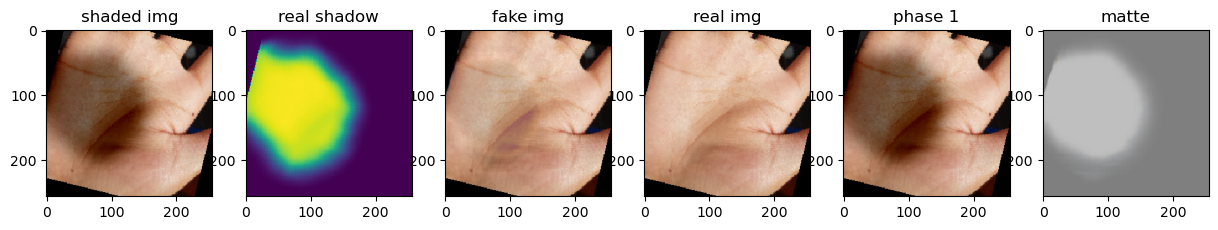

Param:  tensor([[0.3117, 1.0001, 0.3143, 1.0001, 0.3073, 0.9999]])


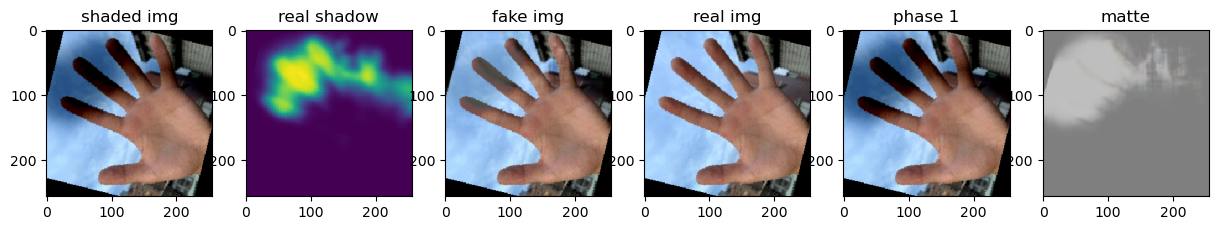

Param:  tensor([[0.3181, 0.9996, 0.3214, 0.9983, 0.3163, 0.9991]])


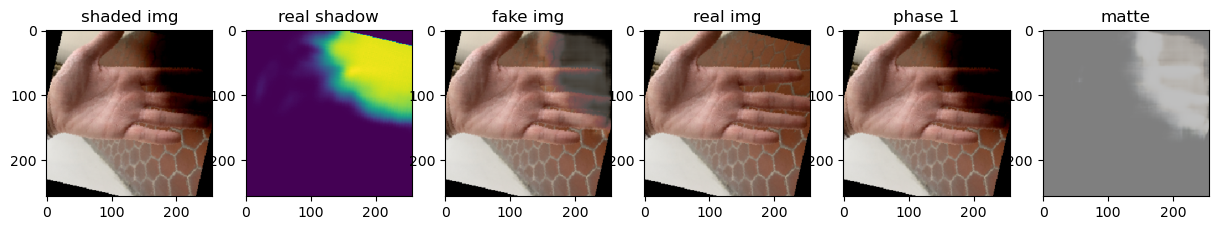

Param:  tensor([[0.3992, 0.9961, 0.4021, 0.9949, 0.3899, 0.9944]])


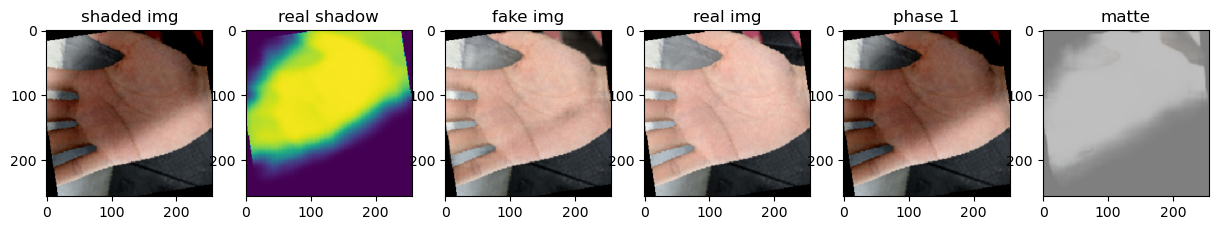

Param:  tensor([[0.3768, 1.0012, 0.3795, 0.9997, 0.3733, 0.9997]])


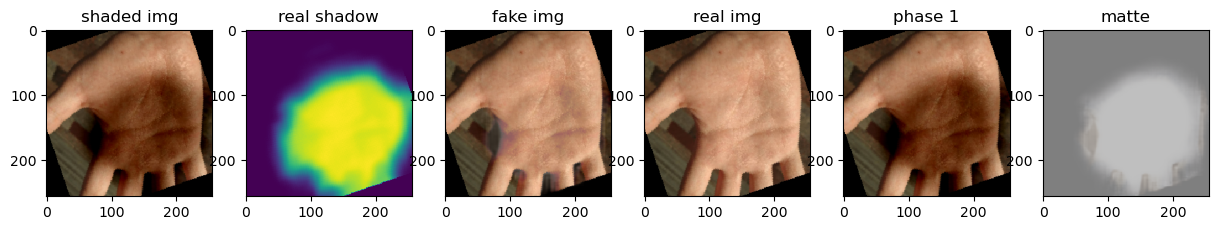

In [14]:
for i in range(len(list_A)):
    
    img_real_A = list_A[i].permute(1,2,0)
    img_real_B = list_B[i][0]
    img_real_C = list_C[i].permute(1,2,0)
    img_fake_C = result_list[i]['final']

    #Scale to 255
    img_real_A = (img_real_A + 1.0)/2.0  
    img_real_C = (img_real_C + 1.0)/2.0
    img_real_B = (img_real_B + 1.0)/2.0 
    
    print("Param: ", result_list[i]['param'])
    label = ['shaded img', 'real shadow', 'fake img', 'real img', 'phase 1', 'matte'] #POS is 1, NEG is 0
    fig,(ax1,ax2,ax3,ax4,ax5,ax6)=plt.subplots(nrows=1,ncols=6, figsize=(15,15))
    ax1.imshow(img_real_A.cpu())
    ax1.set_title(label[0])
    ax2.imshow(img_real_B.cpu())
    ax2.set_title(label[1])
    ax3.imshow(img_fake_C)
    ax3.set_title(label[2])
    ax4.imshow(img_real_C.cpu())
    ax4.set_title(label[3])
    ax5.imshow(result_list[i]['phase1'])
    ax5.set_title(label[4])
    ax6.imshow(result_list[i]['matte'])
    ax6.set_title(label[5])
    plt.show()